## **1. 넷플릭스 데이터셋 파악하기**

### **캐글의 넷플릭스 데이터셋을 다운로드**
* [캐글 사이트 넷플릭스 링크](https://www.kaggle.com/datasets/shivamb/netflix-shows)
* [넷플릭스 데이터셋의 변수 설명]
    * show_id: 각 쇼의 고유 ID (쇼를 식별할 수 있는 고유한 번호)
    * type: 쇼의 카테고리 (영화 또는 TV 쇼)
    * title: 쇼의 이름
    * director: 쇼의 감독 이름
    * cast: 배우의 이름 및 쇼의 다른 출연진
    * country: Netflix에서 프로그램을 시청할 수 있는 국가의 이름
    * date_added: Netflix에 프로그램이 추가된 날짜
    * release_year: 쇼의 출시 연도
    * rating: 넷플릭스 등급 (관람 등급, 예: G, PG, TV-MA 등)
    * duration: 쇼의 지속 시간 (영화는 시간, TV 쇼는 시즌 및 에피소드 수로 표현)
    * listed_in: 쇼의 장르 (예: 액션, 드라마, 코미디 등)
    * description: 쇼를 설명하는 일부 텍스트 (쇼의 줄거리 또는 개요)

#### **데이터 분석 라이브러리 불러오기**
*   Pandas, Numpy, Matplotlib, Seaborn

In [1]:
# numpy 로드하여 np로 사용
# pandas 로드하여 pd로 사용
# matplotlib.pyplot 로드하여 plt로 사용
# seaborn 로드하여 sns로 사용
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print(pd.__version__)

2.3.3


#### **csv 파일 불러오기**
* `pd.read_csv("")` 코드의 큰 따옴표 안에 `경로 붙여넣기`

In [2]:
# 세션 저장소에 업로드한 csv 파일을 읽어 변수에 할당
# csv 파일 읽어오기
netflix = pd.read_csv('data/netflix_titles.csv')
netflix.shape

(8807, 12)

#### **데이터 내용 확인**
- `.columns` : 컬럼명 확인
- `.head(3)` : 데이터의 상단 3개 행 출력
- `.info()` : 데이터에 대한 전반적인 정보 제공
> - 행과 열의 크기
> - 컬럼명
> - 컬럼별 결측치
> - 컬럼별 데이터 타입

In [3]:
# .columns : 열 이름 확인
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# .head(3) : 데이터 처음 3개의 행 출력
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
# .info() : 열에 대한 요약 정보 확인
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## **2. 넷플릭스 데이터셋 결측치 처리하기**

### **결측치란?**
* 데이터에 값이 없거나 부적절한 경우 결측치로 표시함
* NA : Not Available ( 유효하지 않은 )
* NaN : Not a Number ( 숫자가 아닌 )
* Null : 아무것도 존재하지 않음을 의미함 



### **결측치 처리하는 방법**
* 방법1 : 결측치가 있는 행 또는 열을 **제거**하기
    * 데이터 손실 ( 표본 크기의 축소 ) 발생
* 방법2 : 결측치를 다른 값을 **치환**하기
    * 데이터 특성에 맞게 평균,중앙값,최빈값 등으로 대체 가능
    * 다른 변수와 상관관계가 있을 경우, 알맞은 값을 넣어줄 수 있음
    * 도메인 지식이 있는 경우 효율적인 방법
* 방법3 : 예측하는 모델을 사용하여 결측치를 대체하기 ( 모델 기반 처리 )
    * 예측 모델 또는 특성에 맞는 모델을 사용하여 결측치 처리

### **넷플릭스 결측치 비율 확인하기**
* 결측치가 차지하는 비율에 따라 다르게 처리하기
    * **결측치가 데이터의 5% 미만**
        * 일부분에만 결측치가 존재하므로 결측치가 있는 행을 삭제하는 것이 적합합니다. 데이터 손실이 최소화되면, 분석의 신뢰성에 큰 영향을 미치지 않습니다. 
    * **결측치가 데이터의 5%에서 20% 사이** 
        * 결측치가 꽤 많은 상태이므로 삭제보다는 대체하는 하는 방법이 더 적합합니다. 평균,중간값,최빈값 등을 사용해 대체하거나, 필요에 따를 모델 기반 처리도 고려할 수 있습니다.
    *  **결측치가 데이터의 20% 이상**
        * 결측치가 너무 많은 상태이므로 결측치가 있는 열 전체를 제거하는 것이 권장되지만,데이터 손실이 크기 때문에 신중한 판단이 필요합니다.
        * 특히 데이터셋이 작거나 해당 변수가 중요한 역할을 할 때는 모델 기반 대체나 예측 모델을 통해 결측치를 보완하는 것이 더 적합할 수 있습니다. 
        * 따라서, 결측치가 20% 이상이라도 변수의 중요성,분석 목적,데이터량을 종합적으로 고려해 열을 제거할지, 대체할지를 결정하는 것이 중요합니다.
* 이러한 기준을 이론적인 가이드라인일 뿐, 절대적인 규칙은 아닙니다.        

#### **[파이썬 기초 문법] for문을 이용한 리스트 반복문**

In [6]:
# 목표: myList 변수에 국가명이 담긴 리스트를 넣고 반복문으로 출력

# myList는 '반복할 수 있는 것'으로 내부적으로 여러 개의 요소를 포함하고 있으며,
#           요소의 개수만큼 하나씩 순회
# a는 '반복자'로 myList에서 하나씩 꺼낸 요소를 저장하는 반복 변수
myList = ['Korea', 'USA', 'Japan']

for a in myList:
  print(a)

Korea
USA
Japan


#### **[파이썬 기초 문법] 문자열 포맷팅**
* 문자열 안에 어떤 값을 삽입하는 방법

In [7]:
# 목표: format() 함수를 이용한 문자열 포맷팅 수행

# { } 안에 숫자 대입
# format 함수 안에 넣을 숫자 삽입
print("나는 {}호선을 타고 다녀.".format(6))
print("나는 {}호선과 {}호선을 타고 다녀.".format(6, 4))

나는 6호선을 타고 다녀.
나는 6호선과 4호선을 타고 다녀.


#### **for문으로 결측치 비율 확인하기**
* 결측치 비율 확인하고 처리하기
    * .isna().sum()
        * .isna()에서 결측치는 True 반환, 그 외에는 False 반환
        * .isna().sum() 은 각 열의 결측치 개수 반환
        * DataFrame내에서 결측치 개수 반환

In [8]:
print("\n결측치 확인:")
print(netflix.isnull().sum())


결측치 확인:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [9]:
print(netflix.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
# for 반복문을 통해 각 컬럼별 결측치 비율을 계산하여 문자열로 출력

# for i in netflix.columns : 각 열에 대해 반복

# netflix[i].isna().sum() : netflix 데이터 열(column)의 결측치 개수의 합
# .isna( ) : 결측 값은 True 반환, 그 외에는 False 반환
# len(netflix) : netflix 데이터 행(row) 개수
# * 100 : 결측치 비율인 0.xx 를 보기 쉽게 표현하기 위해

# if missingValueRate > 0 : 결측치가 있을 때 실행

# 열 이름과 결측치 비율 출력
# "문자열".format() : 문자열 포맷팅 기법으로 `{ }`에 차례대로 매핑
#                     `{0}`에는 i 매핑, `{1}`에는 round(missingValueRate, 2) 매핑
# round(missingValueRate, 2) : 소수점 2자리까지 반올림

for i in netflix.columns :
    missingValueRate = netflix[i].isna().sum() / len(netflix) * 100
    if missingValueRate > 0 :
        print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [11]:
# netflix.columns의 결과는 Pandas의 Index 객체이며,
# 파이썬의 리스트처럼 for 문에서 요소를 하나씩 꺼내 사용!
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### **결측치 비율에 따른 처리 방법**
* 결측치 비율이 20% 이상인 director 컬럼은 결측치를 대체하는 방식으로 처리
* 결측치 비율이 country(5% ~ 20%) 컬럼과 cast(9.44%)은 결측치 대체로 처리
* 결측치 비율이 5% 미만인 date_add(0.11%), rating(0.05%), duration(0.03%) 결측치 비율이 낮기 때문에 결측치가 있는 행을 삭제로 처리
* 결측치 처리하는 함수
    * fillna() - 결측치를 특정값을 채우거나 대체하여 처리
    * repace(np.nan,'문자') - 결측치를 문자열 바꾸기 함수로 처리하기, np.nan은 결측치를 의미한다.
    * dropna(axis=0) - 결측치가 존재하는 행 전체 제거
        * axis=0 : Row, axis = 1 : Column

#### **fillna( ) 함수로 결측치를 다른 값으로 대체하기**

In [12]:
netflix['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [13]:
# .fillna( ) : 결측치를 다른 값으로 대체하여 처리
# 결측치 비율 : country(9.44%)
netflix['country'] = netflix['country'].fillna('No Data')
# inplace 속성이 원본 데이터를 즉시 변경함 ( pandas 2 버전에서는 warning)
#netflix['country'].fillna('No Data', inplace=True)

In [14]:
print(len(netflix.loc[netflix['country'] == 'No Data']))
netflix.loc[netflix['country'] == 'No Data'].head()


831


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Data,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


#### **replace( ) 함수로 결측치를 다른 값으로 대체하기**

In [15]:
# .replace(np.nan, 'b') : 결측치를 문자열 바꾸기 함수를 통해 처리
# 결측치 비율 : director(29.91%), cast(9.37%)
netflix['director'] = netflix['director'].replace(np.nan, 'No Data')
netflix['cast'] = netflix['cast'].replace(np.nan, 'No Data')

In [16]:
netflix['director'].value_counts()

director
No Data                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [17]:
netflix['cast'].value_counts()

cast
No Data                                                                                                                                                                                       825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

#### **dropna( )로 결측치를 가진 행 제거하기**
- `.dropna(axis = 0)` : 결측치가 있는 행 전체 제거
- `.dropna(axis = 1)` : 결측치가 있는 열 전체 제거
- inplace=True 이므로 DataFrame에 즉시 반영됨

In [18]:
netflix.shape

(8807, 12)

In [19]:
# .dropna(axis = 0) : 결측치가 있는 행 전체 제거
# 원본 객체를 수정하려면 inplace = True 옵션 추가
# 결측치 비율 : date_added(0.11%), rating(0.05%), duration(0.03%)
netflix.dropna(axis = 0, inplace=True)
print(netflix.shape)

(8790, 12)


#### **처리된 결측치 확인 - info( )**

In [20]:
# .info() : 열에 대한 요약 정보 확인
# 8807 rows(원본 데이터 행 개수) - 17 rows(결측치 행) = 8790 rows(결측치가 제거된 행 개수)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


#### **처리된 결측치 확인 - .isna( ).sum( )**

In [21]:
# 데이터프레임의 각 컬럼별 결측치 개수 반환
# isna() == isnull() : 결측 값은 True 반환하고, 그 외에는 False 반환
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **3. 넷플릭스 피처 엔지니어링하기**
* feature engineering

#### **[파이썬 기초 문법] 딕셔너리**
- 딕셔너리는 중괄호 { }로 선언하며, 'key : value' 형태를 쉼표(,)로 연결하여 생성
- 일반적으로 key는 문자열을 사용
- { key1 : value1, key2 : value2, ... key_n : value_n }

In [22]:
# 파이썬 딕셔너리 생성
grade_dic = {
    "A" : 100,
    "B" : 90,
    "C" : 80
}
print(grade_dic)

{'A': 100, 'B': 90, 'C': 80}


#### **[파이썬 문법] 판다스의 데이터프레임**
* 데이터프레임은 행과 열로 만들어지는 2차원 배열의 형태
* 파이썬 딕셔너리로 데이터프레임 생성 가능!

In [23]:
# 판다스 데이터프레임 생성
person = pd.DataFrame({
    "name" : ["Selena", "Seungwoo", "Louis"],
    "job" : ["Data Scientist", "Chef", "Home Protector"],
    "grade" : ["A", "B", "C"]
})
person

,name,job,grade
0,Selena,Data Scientist,A
1,Seungwoo,Chef,B
2,Louis,Home Protector,C


#### **[파이썬 기초 문법] map 함수**
* 기존 값에서 새로운 값으로 변환할 때 (예: 등급을 점수로 변환)

In [24]:
# 목표: map 함수 이용하여 grade 열의 값을 점수로 변환하기
# grade_dic {'A': 100, 'B': 90, 'C': 80}
person['grade'] = person['grade'].map(grade_dic)
person

,name,job,grade
0,Selena,Data Scientist,100
1,Seungwoo,Chef,90
2,Louis,Home Protector,80


### **넷플릭스 시청 등급 변수 생성하기**
* Feature Engineering - 기존에 존재하는 변수를 활용하여 새로운 정보를 추가로 생성하는 과정
* 시청 등급 설명표를 참고하여 Netflix의 rating 변수를 이용한 age_group(시청 등급) 정보를 변수로 생성

- .map( ) : 사전에 정의한 내용을 변수에 적용

- [넷플릭스 시청 등급 설명표](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

In [25]:
netflix['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8790, dtype: object

In [26]:
# 시청 등급 기준표를 참고하여 Netflix의 rating 변수를 이용한 age_group_dic 변수 생성
# rating 컬럼의 값을 age_group이라는 새로운 컬럼으로 복사
netflix['age_group'] = netflix['rating']

# 시청 등급 코드를 더 이해하기 쉬운 표현으로 매핑할 딕셔너리 정의(key, value 선언)
# Older Kids (7+), Teens (13+), Young Adults(16+), Adults(18+)
age_group_dic = {
    'G': 'All',
    'TV-G': 'All',
    'TV-Y': 'All',
    'PG': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'TV-PG': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Young Adults',
    'NC-17': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults'
    }

# map 함수를 이용하여 rating 컬럼의 값을 딕셔너리를 기반으로 변환하여 age_group 컬럼에 저장
# .map( ) : 사전에 정의한 내용을 변수에 적용
netflix['age_group'] = netflix['age_group'].map(age_group_dic)


In [27]:
netflix[['rating','age_group']].head(10)

,rating,age_group
0,PG-13,Teens
1,TV-MA,Adults
2,TV-MA,Adults
3,TV-MA,Adults
4,TV-MA,Adults
5,TV-MA,Adults
6,PG,Older Kids
7,TV-MA,Adults
8,TV-14,Young Adults
9,PG-13,Teens


In [28]:
netflix['age_group'].value_counts()

age_group
Adults          4089
Young Adults    2157
Older Kids      1487
All              567
Teens            490
Name: count, dtype: int64

## **4. 넷플릭스 시각화하기**
### **넷플릭스 색상 시각화하기**
* sns.palplot([`색상RBG`]) : 색상 확인하는 함수
* plt.title() : 그래프의 타이틀 설정
* plt.show() : 화면에 표시하는 기능을 하며, Jupyter를 사용할 때는 자동으로 표시되기 때문에 호출할 필요가 없음(하지만, 쓰는 걸 권장)

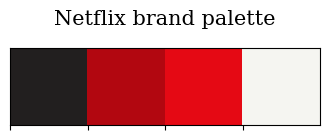

In [29]:
# 넷플릭스 브랜드 상징 색깔 시각화
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])

# 제목 정하기
plt.title('Netflix brand palette', loc='center', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

### **넷플릭스 오징어 게임 검색하기**
* Squid Game(오징어 게임) 검색 조건
* str.contains() : 지정한 문자열이 포함되어 있으면 True 반환, 그 외에는 False 반환
    * na = False : 값이 NA일 경우, False로 처리
    * case = False : 대소문자를 구분하지 않고 검색


In [30]:
print(type(netflix['title'])) # Series
print(type(netflix['title']).str) # StringMethods

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>


#### Series.str.contains() 함수의 인자 설명
* 'squid game'이 포함된 제목을 찾습니다.
* case=False → 대소문자 구분하지 않음 ("Squid Game", "SQUID GAME" 모두 매칭).
* na=False → 결측값(NaN)이 있으면 False로 처리합니다.

In [31]:
# 오징어게임 문자열을 가진 데이터 가져오기
netflix['title'].str.contains('squid game', na=False, case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: title, Length: 8790, dtype: bool

In [32]:
# 오징어 게임을 검색한 조건을 넷플릭스 데이터에 넣어서 True인 값만 출력
netflix[netflix['title'].str.contains('Squid Game', na=False, case=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
33,s34,TV Show,Squid Game,No Data,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",No Data,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,Adults


In [33]:
netflix.loc[netflix['title'].str.contains('Squid Game', na=False, case=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
33,s34,TV Show,Squid Game,No Data,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",No Data,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,Adults


### **넷플릭스 파이 차트 그리기**
* 넷플릭스 파이 차트 그리기
    * plt.pie() - Pie Plot 시각화
        * labels : 부채꼴 조각 이름
        * autopct : 부채꼴 안에 표기될 숫자 형식 지정
            * 문자열 % 포맷팅으로 %0.f 형태는 소수점 없이 정수처럼 인식
            * 진짜 %를 표시하기 위해 %% 로 작성
        * startangle : 부채꼴이 그려지는 시작 각도 설정, 90이면 12시 방향
        * explode : 부채꼴이 Pie Plt의 중심에서 벗어나는 정도 설정
        * shadow : 그림자 효과 표시
    * plt.subtitle() : 전체 Plot의 제목
    * plt.title() : 서브 Plot의 제목
    *             

In [34]:
# Movies & TV shows의 각각 value_counts 출력
# .value_counts() : 값의 개수 출력
type_counts = netflix['type'].value_counts()
print(type_counts)
print(type_counts.index)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64
Index(['Movie', 'TV Show'], dtype='object', name='type')


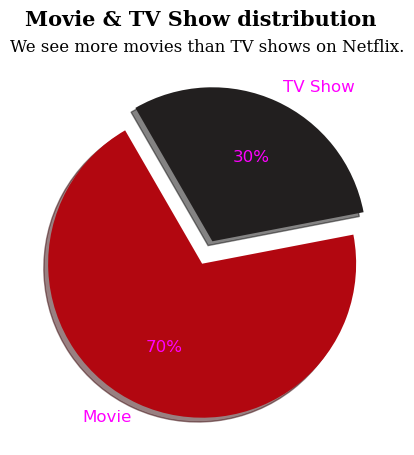

In [35]:
# 5 x 5 크기의 플롯 만들기
# Figure 크기 설정
fig = plt.figure(figsize=(5, 5))

# pie plot 통해 Movies & TV shows 각각 비율 시각화
# plt.pie() 함수의 매개변수 설명
# labels : 부채꼴 조각 이름
# autopct : 부채꼴 안에 표시될 숫자 형식 지정
#           문자열에서 % 포맷팅으로 %0.f 형태로 사용하면 소수점 없이 정수처럼 인식
#           진짜 %를 표시하기 위해 %%로 작성
# startangle : 부채꼴이 그려지는 시작 각도 설정, 90이면 12시 방향
# explode : 부채꼴이 파이 플롯의 중심에서 벗어나는 정도 설정
# shadow : 그림자 효과 표시
plt.pie(type_counts, labels=type_counts.index, autopct='%0.f%%', startangle=120,
        explode=[0.08, 0.08], shadow=True, colors=['#b20710', '#221f1f'], textprops={'color': 'magenta', 'fontsize': 12})

plt.suptitle('Movie & TV Show distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see more movies than TV shows on Netflix.', fontfamily='serif', fontsize=12)
plt.show()

### **넷플릭스 워드 클라우드**
* 워드 클라우드란 텍스트 데이터의 빈도나 중요도를 이용하여 데이터를 시각화하는 방법
    * 중요한 것을 진한 색이나 크기를 크게 하여 만드는 것이 일반적

* from wordcloud import WordCloud 
    * 워드 클라우드 생성 역할을 하는 클래스
* from PIL import Image  
    * 워드 클라우드를 원하는 형태로 그리기 위해 Image를 불러오는 패키지
* WordCloud().generate(text) : 선언해준 text에서 wordcloud를 생성
    * text 변환 - wordcloud에서 작동할 수 있도록 DataFrame을 list로 1차 변환시키고, str(문자열)로 2차 변환
    * mask : 단어를 그릴 위치, 흰색(#FFFF) 항목은 Masking 된 것으로 간주함
* plt.matplotlib.colors.LinearSegmentedColormap.from_list()
    * 컬러맵 생성    
* plt.imshow()
    * array에 색을 채워서 Image로 표시함
* plt.axis('off')
    * 축(axis) 삭제    

#### wordcloud 설치

In [36]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
# -q(quiet) 는 install 한 라이브러릴 정보를 출력하지 않음
%pip install -q wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
# 넷플릭스 데이터의 description 열 이용한 워드 클라우드 생성

# from wordcloud import WordCloud : 워드 클라우드 생성에 필요한 모듈
# from PIL import Image : 워드 클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지
from wordcloud import WordCloud
from PIL import Image

plt.figure(figsize=(15, 5))

# wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고
# str(문자열)로 2차 변환
text = str(list(netflix['description']))
text

'[\'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.\', \'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.\', \'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.\', \'Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.\', \'In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.\', \'The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.\', "Equestria\'s divided. But a bright-eyed hero believes Earth Ponie

<Figure size 1500x500 with 0 Axes>

In [39]:
print(len(text))
print(text[:200])


1294956
['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.', 'After crossing paths at a party, a Cape To


In [40]:


# mask : 단어를 그릴 위치 설정, 흰색(#FFFFFF) 항목은 마스킹된 것으로 간주
# 로고 이미지 열고 넘파이 배열로 변환
mask = np.array(Image.open('data/netflix_logo.jpg'))
mask

array([[[243,  44,  51],
        [243,  44,  51],
        [243,  44,  51],
        ...,
        [255,  35,  47],
        [237,  42,  48],
        [228,  75,  77]],

       [[216,  12,  21],
        [216,  12,  21],
        [216,  12,  21],
        ...,
        [223,  14,  20],
        [197,  31,  31],
        [255, 134, 131]],

       [[222,  12,  23],
        [222,  12,  23],
        [222,  12,  23],
        ...,
        [193,  18,  23],
        [190,  62,  59],
        [255, 221, 211]],

       ...,

       [[228,  19,  25],
        [224,  19,  26],
        [217,  18,  23],
        ...,
        [176,  19,  26],
        [188,  52,  56],
        [255, 192, 193]],

       [[190,  14,  16],
        [192,  22,  22],
        [190,  31,  28],
        ...,
        [212,  26,  39],
        [199,  32,  42],
        [255, 123, 133]],

       [[236,  61,  68],
        [248,  79,  84],
        [255, 104, 107],
        ...,
        [255,  79,  91],
        [237,  55,  67],
        [255,  93, 102]]

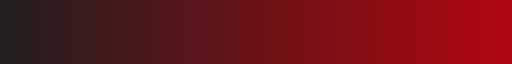

In [41]:

# 워드 클라우드 색상맵 만들기
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list('', ['#221f1f','#b20710'])
cmap

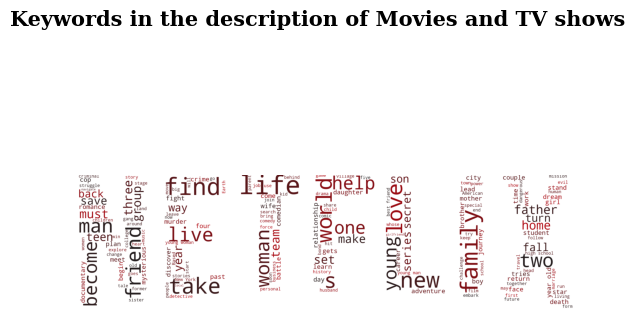

In [42]:

# 워드 클라우드 생성
# WordCloud( ).generate(text) : 선언해준 text에서 wordcloud를 생성
wordcloud = WordCloud(background_color = 'white', width = 1400, height = 1400,
                      max_words = 170, mask = mask, colormap=cmap).generate(text)

plt.suptitle('Keywords in the description of Movies and TV shows',
             fontweight='bold', fontfamily='serif', fontsize=15)

# 워드 클라우드 표시
# plt.imshow( ) : array에 색을 채워서 이미지로 표시
plt.imshow(wordcloud)

# 축 감추기
plt.axis('off')
plt.show()

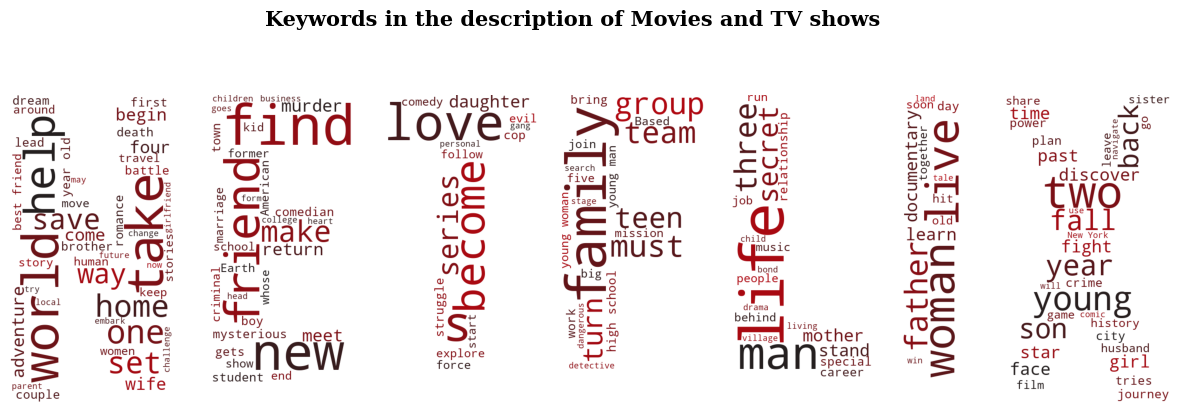

In [43]:
from wordcloud import WordCloud
from PIL import Image

plt.figure(figsize=(15, 5))

# wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고
# str(문자열)로 2차 변환
text = str(list(netflix['description']))
mask = np.array(Image.open('data/netflix_logo.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list('', ['#221f1f','#b20710'])

wordcloud = WordCloud(background_color = 'white', width = 1400, height = 1400,
                      max_words = 170, mask = mask, colormap=cmap).generate(text)

plt.suptitle('Keywords in the description of Movies and TV shows',
             fontweight='bold', fontfamily='serif', fontsize=15)

# 워드 클라우드 표시
# plt.imshow( ) : array에 색을 채워서 이미지로 표시
plt.imshow(wordcloud)

# 축 감추기
plt.axis('off')
plt.show()

### 넷플릭스 장르 분포 Bar Plot
* 장르 분리 및 개별 장르 카운트


In [44]:
netflix['listed_in'].value_counts()

listed_in
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64

#### listed_in 시리즈 객체
listed_in 컬럼의 값
* Comedy, Drama
* Horror, Thriller, Mystery
* Romance

#### split(', ') 적용 후:
* 0: ["Comedy", "Drama"]
* 1: ["Horror", "Thriller", "Mystery"]
* 2: ["Romance"]
#### explode() 적용 결과:
* 0: "Comedy"
* 0: "Drama"
* 1: "Horror"
* 1: "Thriller"
* 1: "Mystery"
* 2: "Romance"

* netflix['listed_in']: Netflix DataFrame의 listed_in 컬럼 선택 (예: "Comedy, Drama, Romance" 형식의 문자열).
* .str.split(', '): 문자열을 쉼표+공백(, ) 기준으로 분할 → 리스트로 변환 예: "Comedy, Drama" → ["Comedy", "Drama"]
* .explode():
    분할된 리스트의 각 요소를 별도의 행으로 확장합니다.
    원본 행의 인덱스를 유지하며 복제됩니다.

결과는 하나의 Series가 됩니다.

In [45]:
# 장르 분리 및 개별 장르 카운트, 새로운 genre_series 객체를 생성함
genre_series = netflix['listed_in'].str.split(', ').explode()
genre_series.value_counts()

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

In [46]:
# Series 객체에서 reset_index() 함수를 호출하면 index의 값이 컬럼이 되므로 DataFrame 객체로 변경이 된다.
genre_counts = genre_series.value_counts().reset_index()
genre_counts.head(3)

,listed_in,count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674


In [47]:
# listed_in 컬럼명을 genre 로 변경됨
genre_counts.columns = ['genre', 'count']
genre_counts.head(3)

,genre,count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674


In [48]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


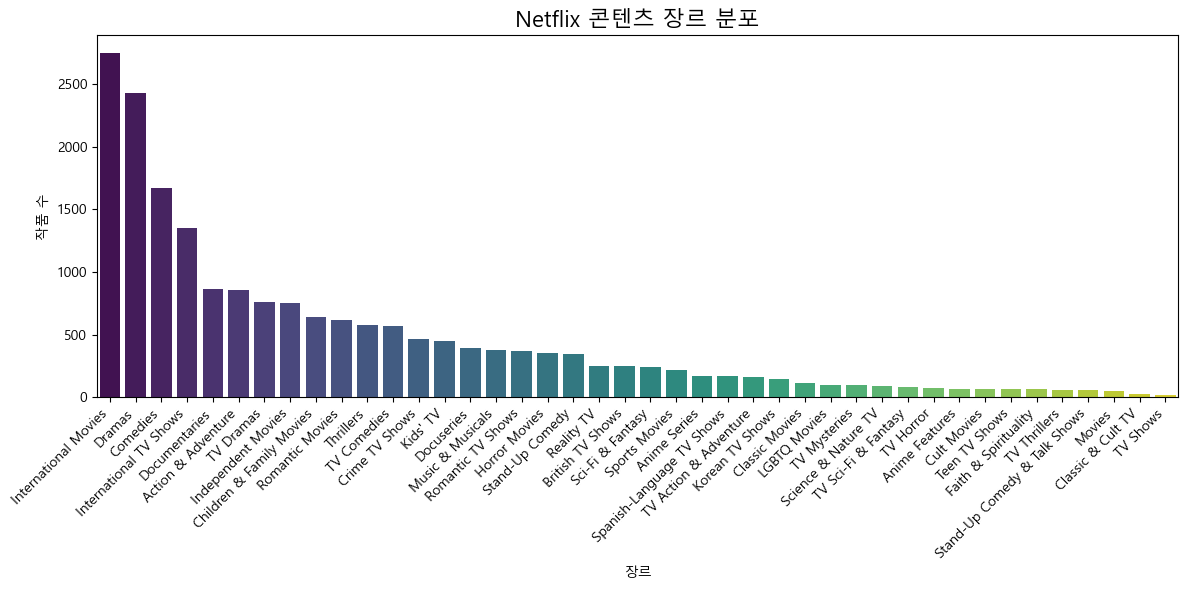

In [49]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=genre_counts,
    x='genre', y='count',
    hue='genre', palette='viridis',
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Netflix 콘텐츠 장르 분포', fontsize=16)
plt.xlabel('장르')
plt.ylabel('작품 수')
plt.tight_layout()
plt.savefig('img/netflix_genre_distribution.png', dpi=300)
plt.show()

### 인기 배우 TOP N 추출


In [50]:
# 배우 분리 (explode)
cast_series = netflix['cast'].str.split(', ').explode()
cast_series

0                     No Data
1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Name: cast, Length: 64841, dtype: object

In [51]:
# 'No Data'는 따로 카운트해서 확인만 하고 싶다면
no_data_count = (cast_series == 'No Data').sum()
print(f"'No Data' 카운트: {no_data_count}")

'No Data' 카운트: 825


In [52]:
# 'No Data' 제거
cast_series_data = cast_series[cast_series != 'No Data']
print(len(cast_series_data))

64016


In [53]:
cast_series_data.value_counts()

cast
Anupam Kher              43
Shah Rukh Khan           35
Julie Tejwani            33
Naseeruddin Shah         32
Takahiro Sakurai         32
                         ..
Julissa Calderon          1
Karrie Martin             1
Ted Kaczynski             1
Tonya Kay                 1
Chittaranjan Tripathy     1
Name: count, Length: 36392, dtype: int64

In [54]:
cast_series_data.value_counts().reset_index().head(10)

,cast,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Paresh Rawal,28


In [55]:
# reset_index()를 사용하면 Series 객체가 DataFrame 객체로 변환해서 저장
cast_df = cast_series_data.value_counts().reset_index()
cast_df.head()

,cast,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


In [56]:
cast_df.loc[cast_df['cast'] == 'Lee Jung-jae']

,cast,count
5004,Lee Jung-jae,3


In [57]:

# 상위 10명 배우 추출해서 새로운 데이터프레임 생성
top_actors = cast_series_data.value_counts().head(10).reset_index()
top_actors.columns = ['actor', 'count']
top_actors

,actor,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Paresh Rawal,28


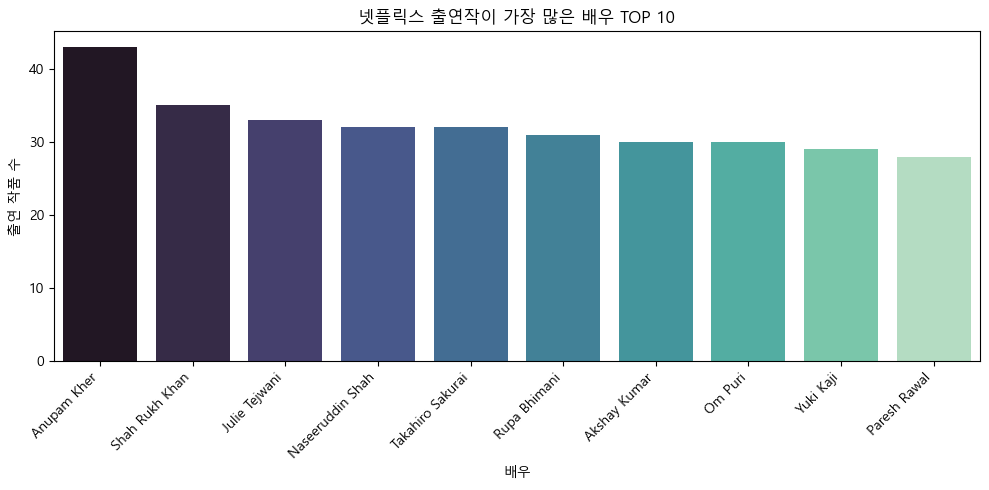

In [58]:

# 시각화
plt.figure(figsize=(10, 5))
#sns.barplot(x=top_actors.index, y=top_actors.values, palette='mako')
sns.barplot(
    data=top_actors,
    x='actor', y='count',
    hue='actor',      # <-- hue 설정
    palette='mako',
    legend=False      # <-- 범례 숨기기
)

plt.xticks(rotation=45, ha='right')
plt.title('넷플릭스 출연작이 가장 많은 배우 TOP 10')
plt.xlabel('배우')
plt.ylabel('출연 작품 수')
plt.tight_layout()
plt.show()

#### 특정 배우의 출연작 필터링 함수

In [59]:
def get_actor_titles(actor_name):
    """입력한 배우가 출연한 넷플릭스 콘텐츠 리스트 반환"""
    return netflix[netflix['cast'].str.contains(actor_name, na=False)][['title', 'type', 'release_year', 'listed_in']]

get_actor_titles('Lee Jung-jae')

,title,type,release_year,listed_in
33,Squid Game,TV Show,2021,"International TV Shows, TV Dramas, TV Thrillers"
3288,Chief of Staff,TV Show,2019,"International TV Shows, Korean TV Shows, TV Dr..."
3793,Svaha: The Sixth Finger,Movie,2019,"International Movies, Thrillers"


> [분석 연습을 위한 추천 데이터셋]
> * Q1. 캐글에서 넷플릭스 데이터셋 이외에도 데이터 분석 연습을 하기 좋은 다른 데이터셋을 추천해 주세요.

> [넷플릭스 데이터셋 피처 엔지니어링]
> * Q2. 넷플릭스 데이터셋에서 어떤 추가적인 변수를 피처 엔지니어링을 통해 생성할 수 있을까요?


> [추천 시스템을 위한 변수]
> * Q3. 넷플릭스 데이터셋을 기반으로 추천 시스템을 구축하기 위해 어떤 변수를 사용할 수 있을까요?

> [수평 막대 그래프 코드]
> * Q4. 넷플릭스 데이터셋을 이용해 수평 막대 그래프를 그리는 코드를 작성해주세요.

> [사용자 집단 분석을 위한 변수]
> * Q5. 넷플릭스에서 특정 장르나 주제의 콘텐츠가 특정 사용자 집단에게 더 인기가 있는지 분석하려면 어떤 변수를 활용해야 할까요?

[넷플릭스 데이터셋의 변수 설명]

* show_id: 각 쇼의 고유 ID (쇼를 식별할 수 있는 고유한 번호)

* type: 쇼의 카테고리 (영화 또는 TV 쇼)

* title: 쇼의 이름

* director: 쇼의 감독 이름

* cast: 배우의 이름 및 쇼의 다른 출연진

* country: Netflix에서 프로그램을 시청할 수 있는 국가의 이름

* date_added: Netflix에 프로그램이 추가된 날짜

* release_year: 쇼의 출시 연도

* rating: 넷플릭스 등급 (관람 등급, 예: G, PG, TV-MA 등)

* duration: 쇼의 지속 시간 (영화는 시간, TV 쇼는 시즌 및 에피소드 수로 표현)

* listed_in: 쇼의 장르 (예: 액션, 드라마, 코미디 등)

* description: 쇼를 설명하는 일부 텍스트 (쇼의 줄거리 또는 개요)

In [61]:
!pip install kagglehub


   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]



In [62]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rankirsh/esports-earnings")

print("Path to dataset files:", path)

100%|██████████| 117k/117k [00:00<00:00, 473kB/s]

Extracting files...
Path to dataset files: C:\Users\wlgh5\.cache\kagglehub\datasets\rankirsh\esports-earnings\versions\26


In [65]:
import pandas as pd
import os

# 위 코드에서 받은 path 내부의 파일 목록 확인
files = os.listdir(path)
print("다운로드된 파일들:", files)

# 만약 파일명이 'esports_earnings.csv'라면
csv_path = os.path.join(path, "HistoricalEsportData.csv")
df = pd.read_csv(csv_path)
print(df.head())

다운로드된 파일들: ['GeneralEsportData.csv', 'HistoricalEsportData.csv']
         Date                          Game  Earnings  Players  Tournaments
0  1998-01-01  Command & Conquer: Red Alert   15000.0        8            1
1  1998-01-01                    QuakeWorld   15000.0        8            1
2  1998-05-01                      Quake II   15000.0        4            1
3  1998-05-01            Total Annihilation   15000.0        2            1
4  1998-05-01                    QuakeWorld     300.0        3            1
